In [ ]:
!git clone https://github.com/stuniy/SPO_PGU.git

Cloning into 'SPO_PGU'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 98 (delta 8), reused 0 (delta 0), pack-reused 69
Unpacking objects: 100% (98/98), done.


# Нейрон и нейронная сеть.

# Искусственный нейрон

Мы работаем в подходе "черного ящика", когда не знаем внутренне устройство изучаемого объекта, но можем измерять его реакцию на различные воздействия, и строить модель такого объекта.

![img](https://drive.google.com/uc?id=1GS0SaGo6i9K1cOkYru0Ws5tnSw61H_uo)

Чтобы проводить моделирование нам необходимо:
- определиться с решаемой задачей
- определиться с доступными данными
- определиться с критерием обучения, функцией ошибки и метриками
- определиться с *видом модели*
- определиться с методом обучения
- определиться со способом проверки модели

Множество разных моделей придумано, например, модели, сделанные в виде набора правил ЕСЛИ…ТО (известные нам деревья решений), или модели, основанные на полиномиальных функциях и прочие, прочие. Каждый имеет право придумать свою собственную модель.

Среди всех возможных видов моделей особо отличаются *сетевые модели*, в которых модель является **сетью (графом) связанных между собой простых вычислительных элементов**.

Такие структуры были подсмотрены в биологии при изучении строения мозга человека и животных, где увидели, что мозг состоит из множества элементов, связанных между собой. Элемент назвали **нейрон**, а сеть таких элементов – **нейронная сеть**.



#  БИОЛОГИЧЕСКИЙ НЕЙРОН
Упрощенно, биологический нейрон состоит из тела клетки (ядра), в котором происходит обработка сигналов, аксона (выхода) и дендритов (входов). Аксоны одних нейронов соединяются с дендритами других нейронов посредством синапсов.

![img](https://drive.google.com/uc?id=1DoLXHeoa2yJfkSH571_lpkd0zH6ABraH)

Один нейрон связан примерно с 20 000 других нейронов. В коре головного мозга десятки миллиардов нейронов.

Биологический нейрон - очень сложное устройство, но люди научились строить его гораздо более простые искусственные модели, которые называют **искусственным нейроном**. Их много разных типов, с некоторыми мы познакомимся в этом курсе.


# ПРОСТЕЙШАЯ МОДЕЛЬ ИСКУССТВЕННОГО НЕЙРОНА

Нейрон принимает в себя сигналы из других нейронов через дендриты-входы, обрабатывает их и посылает результат через выход-аксон своим соседям, с которыми он связан. Выяснилось также, что сила сигнала в дендритах разная, зависит от состояния синапса. Придумали простую модель, которая имитирует такое поведение:

Нейрон принимает множество входов **Х<sub>i</sub>**, умножает каждый их них на свой коэффициент (называют вес) **W<sub>i</sub>**, складывает такие произведения. К этой сумме добавляется некоторое число **W<sub>0</sub>** (называют смещением), а результат преобразуется заданной нелинейной функцией **F()** (активация) и передается на выход **Y**.

![img](https://drive.google.com/uc?id=1Lq9OwxVRlMoE7fjZYcFQbaFsE14aM3kE)

Входы – внешние данные; веса, смещение, активация – внутренние параметры нейрона. Каждый нейрон имеет свои собственные параметры. Изменяя параметры нейрона, изменяется и его поведение, значит, подбирая параметры нейрона мы можем его обучать.

Нелинейная функция активации необходима если мы хотим делать нелинейные преобразования вход-выход, иначе они были бы линейные, что можно определить по формуле работы нейрона.

К функции активации предъявляют требования (иногда нарушаются):
- непрерывная
- монотонная (монотонно возрастающая или монотонно убывающая) 
- нелинейная
- дифференцируемая

На картинке ниже приведены некоторые функции активации, которые часто используются в нейронах. Вспомните математику и назовите для каждой функции, какие требования для нее выполнены, а какие нет.

![img](https://drive.google.com/uc?id=1j2BPkk-BUsUQ1yEcAhTPRmKvHV7U4l_q)



**Нейрон это вычислительный элемент**, но много ли может один нейрон?

Может решать задачу классификации, если классы *линейно разделимы*.

На картинке ниже между красными и синими точками (классы) можно провести прямую линию, которая их разделит, такие классы и называют линейно разделимыми, и один нейрон может решить такую задачу. Координаты точки это входы в нейрон, можно договориться, что если выход нейрона больше 0, то считаем точку синей, если меньше - то красной. 

Можно найти такие веса и смещение нейрона, чтобы для всех синих точек выход оказался больше 0, а для всех красных - меньше. 

![img](https://drive.google.com/uc?id=18zb8jA_5haS7R7f6mG3Uil1qgEZ3Ihn8)

Возьмем, например, тождественную функцию активации, тогда условие раздела между классами запишется как: \\(x_1 * w_1+x_2 * w_2 + w_0 = 0\\) , а это есть уравнение прямой. Разделяющая поверхность нейрона - прямая линия (плоскость в многомерном случае).

Но для случая на картинке ниже так не получится, нельзя провести прямую, которая бы разделила наши классы, они линейно неразделимы, и наш нейрон не может решить эту задачу классификации.

![img](https://drive.google.com/uc?id=1bfIXKbyB7QbEcQhQRWpxZ9ZNtTjxIxRH)


В замечательной книжке Кира Булычева можем найти такой диалог: 

> Микроскопические водоросли, примитивные организмы, встречаются на Земле. Разумом не отличаются.
>
>— Это еще не факт,может, если сложить их вместе, получится коллективный разум.
>
>— Если даже целое поле капусты сложить вместе, получится большая куча капусты, но никакого >разума. 
>
> (с) Кир Булычев

И правда, как не складывай капусту, разума не получишь. 

Но для нейронов это не так! 

Если чего-то не может решить один нейрон, то, может быть, смогут несколько нейронов вместе?

Давайте объединим нейроны в сеть. В зависимости от того, как именно они объединяются, получаются различные виды нейронных сетей с различными свойствами.

Первый вид – слоистые нейронные сети, когда нейроны объединяются в слои, и связи есть между слоями, а среди таких сетей выделяется **многослойный персептрон** (multilayer perceptron, MLP).


 


# МНОГОСЛОЙНЫЙ ПЕРСЕПТРОН
 
Нейроны (желтые кружки) сгруппированы в несколько слоев расположенных последовательно.

Выходы всех нейронов одного слоя подключаются ко входам всех нейронов следующего слоя.

Внешние данные (входы сети, синие кружки) поступают на все нейроны первого (входного) слоя.

Выходы сети снимаются с выходов нейронов последнего (выходного) слоя.

Слои нейронов, кроме выходного, называют скрытыми.

![img](https://drive.google.com/uc?id=1fpjXqv9DgUkyi38VZUMHPjoqqD0gRaXX)



А что может многослойный персептрон?

Все, что угодно! (в разумных пределах). Нейроны не капуста, они могут взаимодействовать друг с другом, и в таком сотрудничестве решать любые задачи.

Доказана теорема, что многослойный персептрон *с одним скрытым слоем* может аппроксимировать (приблизить) любую непрерывную функцию, заданную на ограниченном множестве, с любой заданной точностью.

Если вам интересна математика - посмотрите теорему здесь: https://ru.wikipedia.org/wiki/Теорема_Цыбенко   

Но к сожалению, разница между теоретическим существованием решения и возможностью его найти громадна. Поэтому, хоть и доказано, что многослойный персептрон универсален, никто не гарантирует что вы сможете им воспользоваться для вашей задачи. Именно поэтому существует огромное разнообразие всяко-разных нейронных сетей.

Сегодня персептроны используются большей частью не самостоятельно, а в составе других типов нейронных сетей, но все еще играют важную роль в построении моделей.


Как и у любой модели у персептрона есть параметры (обучаемые числа) и гиперпараметры (необучаемые, но задаваемые числа).

Гиперпараметры:
- число слоев нейронов,
- число нейронов в каждом слое.

Параметры персептрона это параметры всех его нейронов. Каждый нейрон в персептроне имеет свои собственные параметры:
- веса, смещение,
- функция активации (но часто ее относят к гиперпараметрам, не обучают и выбирают одинаковой у всех нейронов слоя).

Для примера посчитайте сколько весов и смещений у персептрона на рисунке выше, у которого 4 входа, 4 нейрона в первом слое, 5 нейронов во втором и 3 нейрона в третьем, последнем слое.
Помните, что выход каждого нейрона одного слоя, подключается ко входу всех нейронов следующего слоя.




 **Решение:**
<details> 

Число весов у каждого нейрона равно числу входов в него, а значит равно числу нейронов в предыдущем слое, или, для первого слоя нейронов – числу входов в сеть.

В первом слое 4(нейрона)*4(входа у каждого)=16 весов

Во втором слое 5(нейронов)*4(входа у каждого)=20 весов

В третьем слое 3(нейрона)*5(входов у каждого)=15 весов

Итого 16+20+15=51 вес

У каждого нейрона есть одно смещение, итого 4+5+3=12 смещений.

Функции активации никто не обучает (а зря, вполне можно), поэтому их не считаем.
</details>


# Обучение многослойного персептрона

Задача обучения — это задача оптимизации функции ошибки Е по весам (и смещениям) w, наверное, люди уже умеют оптимизировать функции. Мы уже мимоходом упоминали про градиентный спуск, именно он (или его модификации) и используется для обучения нейронных сетей и многослойного персептрона в том числе. Напомним, что такое градиентный спуск (gradient descent):

Представьте, что вы стоите на горе с закрытыми глазами. Вам надо спуститься вниз. Вы не видите, где этот низ расположен, но чувствуете, в какую сторону поверхность спускается, и можете понять, идти ли вам направо или налево, чтобы спускаться. 

![img](https://drive.google.com/uc?id=1P1hx-S1st_Wj8BqnhQ6Jem0qoX7I9hCj)

Ах, вот если бы для функции, не видя ее графика, можно было бы понять, она увеличивается или уменьшается в конкретной точке.
Если вы не прогуливали школу, то знаете, что как раз это-то показывает производная функции. Если производная больше нуля - функция возрастает с ростом аргумента, если меньше нуля - убывает, а если ноль - то не изменяется. 
Нам нужен минимум функции ошибки, значит двигаться надо в сторону ее убывания. 

Вы, стоя на горе, можете сделать маленький шаг в направлении низа, и мы можем немножко изменить параметр модели в том направлении, куда функция ошибки убывает по этому параметру. А потом еще раз, и еще раз, и еще. Дойдем до низа, производная станет равна нулю. Если перескочим (ну вот такие длинные шаги), сразу почувствуем, что направление изменилось и низ с другой стороны, а производная изменит знак.

Все что нам нужно сделать, так это считать производную функции ошибки по всем параметрам и изменять их, постепенно увеличивая или уменьшая в зависимости от знака (и величины) производной. В многомерном случае, когда параметров много, нам нужно считать производные функции ошибки по каждому из них, 100 параметров - 100 производных посчитать надо. Вектор, составленный из производных по каждому параметру, называют градиентом, а такой метод оптимизации – градиентный спуск.


Для любого параметра **w<sub>i</sub>** на шаге **n** мы можем найти производную функции ошибки **E** по этому параметру и изменить параметр в сторону, обратную знаку этой производной (ищем минимум). На сколько именно изменять будем регулировать числом «эта», которое называют шагом обучения.

![img](https://drive.google.com/uc?id=140q4UKhC9v-Hhz7dMtOoJS8n01OMSJbG)


А можем ли мы найти производную функции ошибки по весам и смещениям нейронов для персептрона? Конечно, если только она существует (дифференцируема).

Производные можно (а нужно ли?) искать аналитически или численно. В последнем случаем можно заставить это делать компьютер. 

Неплохое видео по теме https://www.youtube.com/watch?v=pp2FkTqdg9Q 
https://www.youtube.com/watch?v=f9oDe4Yq4E0



Если б вы потрудились хоть один раз написать градиент для персептрона на листочке, то могли бы заметить, что вычисления производных по разным параметрам имеют общие черты, вычисляя производные для весов нейронов на втором слое, мы будем делать часть вычислений совпадающих с вычислениями производных для весов нейронов третьего слоя и т.п. Это не случайно и определяется структурой связей между нейронами, и такой факт можно использовать для облегчения расчета производных функции ошибки по параметрам. Метод получил названия **метод обратного распространения ошибки** (backpropagation).

# Метод обратного распространения ошибки

Посмотрим внимательно на то, как разные величины в персептроне зависят друг от друга.

![img](https://drive.google.com/uc?id=1mAchMWIB_A0xBfoS7J4AlO_3kn47PgOD)

Функция ошибки **E** есть функция от выходов персептрона, обозначим их как \\( y_i^M\\), i-ый выход в  последнем слое M (это не степень, а индекс), и указаний учителя **t**. От входов, весов и прочего она зависит только косвенно, через выходы персептрона.

\\( E(y_1^M, y_2^M, y_3^M,…, t) \\)

Выход \\( y_i^m\\) любого нейрона m-ого слоя зависит от:
- входов в него, т.е. выходов нейронов предыдущего m-1 слоя (для первого слоя - от входов в сеть)
- параметров нейрона (веса\смещения, функция активации).

От входов сети, параметров нейронов на предыдущих слоях такие выходы зависят лишь косвенно, через выходы нейронов предыдущего слоя (кроме первого слоя, который напрямую зависит от входов). От выходов и параметров нейронов на этом же или следующих слоях такие выходы не зависят.

Это справедливо для любого слоя нейронов m: 

$$ y_1^m(y_1^{m-1},y_2^{m-1},y_3^{m-1}…,W_1^{m}); \\
y_2^m(y_1^{m-1},y_2^{m-1},y_3^{m-1}…,W_2^{m}); \\
y_3^m=... $$

( для первого слоя вместо выходов $y_i^0$ берем входы сети $x_i$ )

Вид зависимости определен структурой связей персептрона.

Вспомним уроки математики: "цепное" правило для нахождения производной сложной (составной) функции:

![img](https://drive.google.com/uc?id=12NvwAG2U-mPvZBKnZFWnxIMamHMwAHwB)

А разве у персептрона не так? 

Так. Например, выход первого нейрона препоследнего слоя является аргументом (входом) для выходов всех нейронов последнего слоя, которые являются аргументами функции ошибки.

Тогда по "цепному" правилу дифференцирования для любого слоя нейронов, кроме последнего,  можем найти производные функции ошибки по выходам нейронов в нем через производные по всем выходам нейронов в следующем слое.

$$ \frac{\partial E}{\partial y_i^m}= \sum_{j=1}^{N_{m+1}} \frac{\partial E}{\partial y_j^{m+1}} * \frac{\partial y_j^{m+1}}{\partial y_i^{m}}  $$

Здесь второй множитель в сумме это производные выхода нейрона по его входу, что ищется легко (а ну-ка найдите). Первый множитель - производные ошибки по выходам нейронов следующего слоя.

Получается мы можем как-бы в обратную сторону считать производную функции по выходам нейронов: если знаем для последнего, по этой формуле пересчитаем для предпоследнего, а зная для предпоследнего, пересчитаем для пред-предпоследнего слоя и т.д. 

Для выходов нейронов последнего слоя производные найдем сами, зная вид функции ошибки (а ну-ка найдите для квадратичной функции ошибки).

Но нам надо искать производные не по выходам нейронов, а по параметрам (весам и смещениям).

Обратим внимание, что вес (смещение) влияет в первую очередь на выход своего нейрона, которому он принадлежит, а потом уж этот выход влияет на выходы нейронов в следующем слое и функцию ошибки. Опять же по правилу дифференцирования сложной функции получаем для любого веса нейрона (и смещения):

$$ \frac{\partial E}{\partial w_{ij}^m}=  \frac{\partial E}{\partial y_j^{m}} * \frac{\partial y_j^{m}}{\partial w_{ij}^{m}}  $$

Первый множитель берем из предыдущей формулы, второй - производная выхода нейрона по одному из его весов - считается легко (а ну-ка посчитайте).

Эти две формулы составляют суть **метода обратного распространения ошибки**, в котором производная ошибки пересчитывается итеративно по слоям, начиная с последнего.  

Конечно, нам нет необходимости считать такие производные вручную, это должен делать компьютер, все сводится к умножению и сложению некоторых векторов и матриц.

Ровно так и работает обучение нейронных сетей. Метод обратного распространения ошибки для расчета производных очень универсален, для других сетей, в которых нейроны связаны по другому, он также может быть применен, только надо учитывать, как нейроны влияют друг на друга. И даже не для нейронных сетей, а для произвольных вычислений, можно реализовать такой метод, так работает автодифференцирование, пример которого мы видели на прошлом уроке. 


## Проблемы градиентного спуска

Градиентный спуск сам по себе не очень хороший метод для обучения, у него есть много проблем, например:
- застревает в локальных минимумах: если у функции ошибки несколько минимумов, то дойдя до одного из них, производная станет равна 0 и параметр больше изменяться не будет, но этот минимум может оказаться не самым лучшим.
- необходимо задавать начальные значения параметров: вспомните формулу, из "старых" значений вычитаем производную, перед началом обучения эти самые "старые" значения должны уже быть определены. И от выбора начальных значений параметров будет зависеть результат обучения.
- надо задавать величину шага (число "эта" в формуле): слишком маленькое - будем очень долго идти к минимуму, очень большое - проскочим его.
- и другие

Поэтому используют множество разных модификаций градиентного спуска, в которых добавляют новые члены в формулу, придумывают как изменять шаг, как ограничить параметры и прочее.
Мы не будем вникать в смысл этих методов, важно что все они основаны на градиентном спуске и используют производную (градиент), вычисляемую с помощью метода обратного распространения ошибки. Можно посмотреть, например, здесь про разные методы: https://ruder.io/optimizing-gradient-descent/  

Нет какого-то одного "лучшего" метода обучения, придется экспериментировать и использовать различные. 

## Персептрон


In [ ]:
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# sklearn
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

iris = pd.read_csv("/content/SPO_PGU/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Неверно классифицированные образцы: 11
Точность: 0.76


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

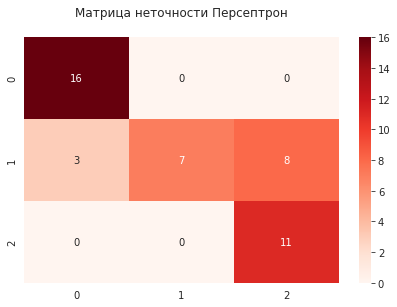

In [ ]:
X = iris.iloc[:,1:4]
y = iris["Species"]

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

ppn = Perceptron(max_iter=100, eta0=0.1, random_state=0)
ppn.fit(X_train,y_train)
y1 = ppn.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test != y1).sum())
print('Точность: %.2f' % accuracy_score(y_test, y1))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, y1)
sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

# Многослойный персептрон в sklearn
Но давайте перейдем от сложной теории к практике. Посмотрим как реализуется многослойный персептрон в уже известной нам библиотеке `sklearn`.

К слову, а обратили ли вы внимание, что нейрон, если у него выбрать тождественную функцию активации, полностью совпадает с моделью линейной регрессии? Это так и есть.

Персептрон реализован в модуле [`.neural_network`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neural_network) 

Есть классификатор [`MLPClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
и регрессор [`MLPRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor).

Обучение ведется в пакетном режиме (вспомните, что это). 

При создании регрессора `MLPRegressor` можем указать следующие аргументы:
* `hidden_layer_sizes` - кортеж, определяющий число нейронов в скрытых слоях, по умолчанию (100,) - один скрытый слой в котором 100 нейронов.
* `activation` - название функции активации для срытых слоев,по умолчанию `relu` - кусочно-линейная функция, можно указать также: `identity` - тождественная,  `logistic` - логистическая сигмоида, `tanh` - гипертангенс.
* `solver` - название метода обучения, по умолчанию `adam` одна из лучших модификаций градиентного спуска, можно использовать также `sgd` - градиентный спуск (называют его стохастическим, так как ошибка считается не на всех данных, а только на одном пакете) и `lbfgs` который быстрее для набора данных небольшого объема.
* `learning_rate_init` - начальное значение величины шага обучения.  
* `max_iter` - максимальное количество эпох обучения, т.е. сколько раз каждый пример данных будет использован в обучении. Напомним, что в пакетном обучении данные разбиваются на группы-пакеты, на каждом пакете происходит обучение, а потом эти же данные еще раз разбиваются на пакеты и процесс повторяется.  
* `shuffle` - логическая переменная, которая показывает перемешивать ли данные в пакетах для каждой эпохи или нет (по умолчанию - перемешивать).
* `verbose` - выводить ли на экран информацию об обучении.
* и другие

Создается объект со следующим полями:
* `n_layers_` - число слоев сети. Принято входы также включать в слои (но только это не слой нейронов, а слой входов). Число слоев нейронов на единицу меньше, чем это число. 
* `coefs_` - список, i-ый элемент которого содержит веса связей от i-ого слоя к (i+1)-ому 
* `intercepts_` - список, i-ый элемент которого содержит смещения (i+1)-ого слоя 
* `n_outputs_` - число выходов сети
* `n_iter_` - число эпох, в течении которых персептрон обучался 
* `loss_` - достигнутое значение функции ошибки
* и другие

Объект имеет такие же методы, как и другие модели:
* `fit(X, y)` - обучение модели на примерах входа **Х** и указаний учителя **y**. Есть также `partial_fit()`, чтобы обучать на одном примере (онлайн обучение).
* `predict(X)` - расчет выходов модели при заданных входах **Х**
* `score(X, y)` - расчет величины отклонения выходов от указаний учителя **у** (а именно коэффициент детерминации R2)
* и другие


У классификатора `MLPClassifier` такие же аргументы, поля и методы, но есть еще 
* поле  `classes_` - с метками классов
* методы `predict_proba(X)` и `predict_log_proba(X)` для расчета вероятностей получения классов (а не их меток).

In [ ]:
from sklearn.neural_network import MLPRegressor # подключаем модуль
from sklearn.datasets import make_regression # функция для генерации данных
from sklearn.model_selection import train_test_split # разделение на обучение и тест
X, y = make_regression(n_samples=200, random_state=1) # создаем данные, 200 примеров
X_train, X_test, y_train, y_test = train_test_split(X, y, #
                                                    random_state=1) # разбиваем на обучение и тест
regr = MLPRegressor(random_state=1, 
                    hidden_layer_sizes=(2,2,), # количество нейронов в скрытых слоях  (2слоя в каждом 2 нейрона)
                    max_iter=50 # число эпох обучения
                    ).fit(X_train, y_train) # создаем и обучаем регрессор из многослойного персептрона
pred=regr.predict(X_test) # проверяем на тесте
pred_train=regr.predict(X_train)
regr.score(X_test, y_test) # смотрим на качество решения

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-0.010907262106784499

Как видите здесь работа ничем не отличается от других методов. Постройте картинки сравнения предсказанных и истинных значений выходов y для обучения и теста и посмотрите, как влияют параметры числа слоев и нейронов и максимальное число эпох на результат. Добейтесь, чтобы на обучении разница была незаметна.

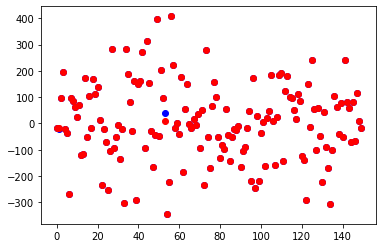

In [ ]:
# Обучение
from matplotlib import pyplot as plt
plt.scatter(range(150),y_train,c='blue')
plt.scatter(range(150),pred_train,c='red')

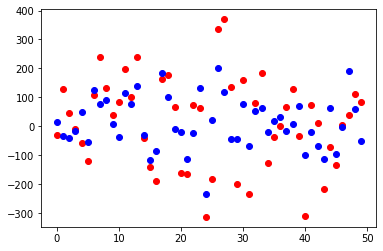

In [ ]:
# Тест
from matplotlib import pyplot as plt
plt.scatter(range(50),y_test,c='red')
plt.scatter(range(50),pred,c='blue')


Неверно классифицированные образцы: 3
Точность: 0.93


Text(0.5, 1.1, 'Матрица неточности Персептрон\n')

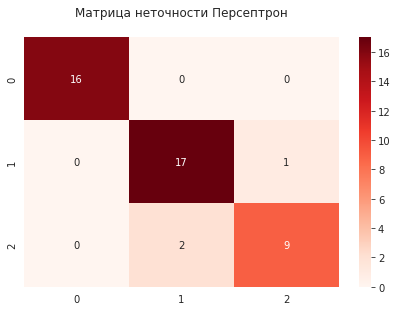

In [ ]:
mlp= MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5, max_iter=10000, hidden_layer_sizes=(5,), random_state=1)
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
print('Неверно классифицированные образцы: %d' % (y_test != mlp_pred).sum())
print('Точность: %.2f' % accuracy_score(y_test, mlp_pred))

# матрица неточности

cnf_matrix_log = confusion_matrix(y_test, mlp_pred)

sns.heatmap(pd.DataFrame(cnf_matrix_log), annot=True,cmap="Reds" , fmt='g')
plt.tight_layout()
plt.title('Матрица неточности Персептрон\n', y=1.1)

## Домашнее задание
1. Повторите эксперимент, лабораторной работы.
2. Используя один из наборов данных, например, diabets проведите классификацию.
3. Оценить качество построенной модели, основываясь на матрице неточности и ROC-анализе.
